# Distribuciones en forma de anillo

In [2]:
from math import sin,cos,radians,pi,sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0,2*pi,n_samples)
    distance = rnd.uniform(r_min,r_max,n_samples)
    data = []
    for a,d in zip(angle,distance):
        data.append([d*cos(a),d*sin(a)])
    return np.array(data)

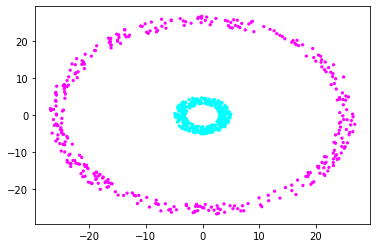

In [4]:
data1 = ring(3,5)
data2 = ring(24,27)

data = np.concatenate([data1,data2],axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))],[1 for i in range(0,len(data2))]])

plt.scatter(data[:,0], data[:,1], c = labels, s = 5,cmap = 'cool')

# Algoritmo con K means

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(2).fit(data)

In [7]:
clust = km.predict(data)

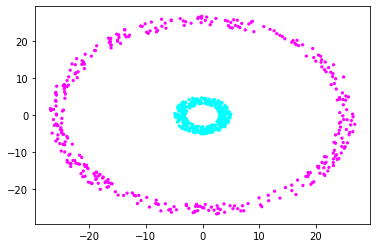

In [15]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = 'cool')

# Algoritmo de los K Meoides

In [9]:
from pyclust import KMedoids

In [10]:
kmed = KMedoids(2).fit_predict(data)

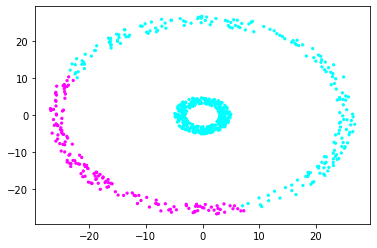

In [16]:
plt.scatter(data[:,0],data[:,1], c = kmed, s = 5, cmap = 'cool')

# Algoritmo del Clustering Espectral

In [12]:
from sklearn.cluster import SpectralClustering

In [13]:
clust = SpectralClustering(2).fit_predict(data)

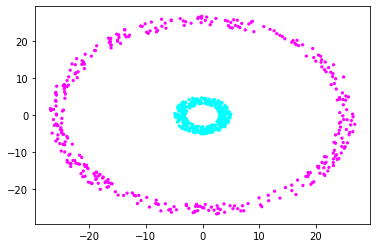

In [17]:
plt.scatter(data[:,0],data[:,1],c=clust,s=5,cmap = 'cool')

## Recordar

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral
        